# Task 6.3 Geographical Visualizations with Python

## Contents
    01.Importing Libraries & Data
    02.Data Wrangling
    03.Data Cleaning
    04.Plotting a Choropleth
    05.Discussing the Results|

###     01.Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
%matplotlib inline

In [2]:
#defining path to project folder
path=r'C:\Users\rache\Documents\House Sales Analysis'

In [4]:
#importing house_sales_upd2.pkl
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'house_sales_upd2.pkl'))

In [7]:
#importing ".json" file for the U.S. 
country_geo=r'C:\Users\rache\Documents\House Sales Analysis\02 Data\Original Data\us.json.txt'

In [8]:
f=open(r'C:\Users\rache\Documents\House Sales Analysis\02 Data\Original Data\us.json.txt',)
  
#returns JSON object as a dictionary
data=json.load(f)
  
#iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [9]:
df.head()

,Index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Home Size Category
0,0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,False,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Small
1,1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,False,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Moderate
2,2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,False,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Small
3,3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,False,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Moderate
4,4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,False,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Small


In [10]:
df.shape

(21613, 23)

### 02.Data Wrangling

In [11]:
#Dropping index column
df=df.drop(['Index'],axis = 1)

In [30]:
#creating a new column for average price for each zip code
df['avg_price'] = df.groupby(['zipcode'])['price'].transform(np.average)
df[['avg_price','zipcode']].head(20)

,avg_price,zipcode
0,310612.755725,98178
1,469455.770732,98125
2,462480.035336,98028
3,551688.673004,98136
4,685605.775510,98074
5,678163.059259,98053
6,294111.278571,98003
7,302878.882143,98198
8,359483.239583,98146
9,366867.600000,98038


In [44]:
#subsetting the columns for the map
view_map = df[['zipcode', 'avg_price','lat','long']]

In [45]:
view_map.shape

(21613, 4)

### 03. Data Cleaning

In [46]:
#checking subset for missing values
view_map.isnull().sum() #no missing values

zipcode      0
avg_price    0
lat          0
long         0
dtype: int64

In [47]:
#checking the frequency of listing by zipcode
view_map['zipcode'].value_counts(dropna = False)

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [48]:
#droping duplicate values
view_map=view_map.drop_duplicates()

In [49]:
view_map.shape

(20834, 4)

In [50]:
#sorting by avg_price
view_map.sort_values(by = 'avg_price', ascending=False)

,zipcode,avg_price,lat,long
17209,98039,2.160607e+06,47.6232,-122.235
14803,98039,2.160607e+06,47.6112,-122.226
19236,98039,2.160607e+06,47.6177,-122.229
2974,98039,2.160607e+06,47.6172,-122.230
5178,98039,2.160607e+06,47.6109,-122.226
...,...,...,...,...
13709,98002,2.342840e+05,47.2782,-122.212
16550,98002,2.342840e+05,47.2979,-122.223
4610,98002,2.342840e+05,47.2875,-122.218
4579,98002,2.342840e+05,47.2802,-122.211


<AxesSubplot:xlabel='avg_price', ylabel='Count'>

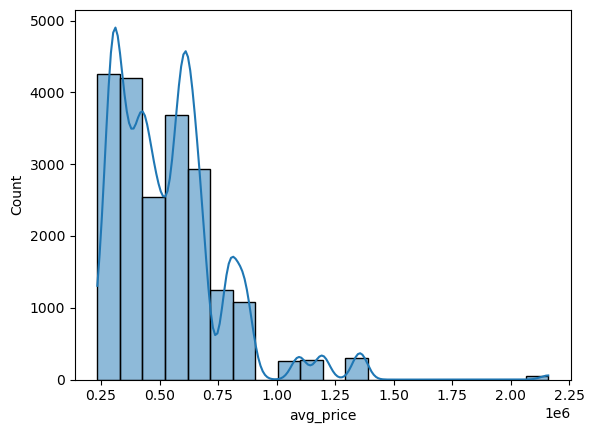

In [51]:
sns.histplot(view_map['avg_price'], bins=20, kde = True) # shows extreme values for 'avg_price'

In [52]:
# Check how many extreme values
view_map[view_map['avg_price'] >2000000]

,zipcode,avg_price,lat,long
2974,98039,2160606.6,47.6172,-122.230
3761,98039,2160606.6,47.6206,-122.225
4077,98039,2160606.6,47.6328,-122.236
4149,98039,2160606.6,47.6151,-122.224
4411,98039,2160606.6,47.6289,-122.233
4791,98039,2160606.6,47.6187,-122.226
5178,98039,2160606.6,47.6109,-122.226
5589,98039,2160606.6,47.6144,-122.228
5880,98039,2160606.6,47.6209,-122.237
6868,98039,2160606.6,47.6308,-122.238


### 04.Plotting a Choropleth

In [53]:
#setting up a map
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = view_map,
    columns = ['zipcode','avg_price'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.1,
    legend_name = "Average Price").add_to(map)
folium.LayerControl().add_to(map)

map

### 05.Discussing the Results

#### Discuss the results and what they mean in a markdown section.
- Does the analysis answer any of your existing research questions?
- Does the analysis lead you to any new research questions?

This analysis really isn't helpful as it really only works when comparing larger regions like states or countries.  My data is all about one county inside one state. There are different zip codes and seeing the differences between zip codes would be nice but this map is unable to show that.

In [54]:
map.save('choropleth.html')